In [1]:
import numpy as np
import pandas as pd

In [2]:
trained_df=pd.read_csv(r"C:\Users\MANISHA JUDHA\Downloads\Malignant-Comments-Classifier-Project--1---1-\Malignant Comments Classifier Project\train.csv")
tested_df=pd.read_csv(r"C:\Users\MANISHA JUDHA\Downloads\Malignant-Comments-Classifier-Project--1---1-\Malignant Comments Classifier Project\test.csv")

In [3]:
trained_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
tested_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
trained_df.shape

(159571, 8)

In [6]:
tested_df.shape

(153164, 2)

In [7]:
trained_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
tested_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [9]:
trained_df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
trained_df.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There is no null value givan

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

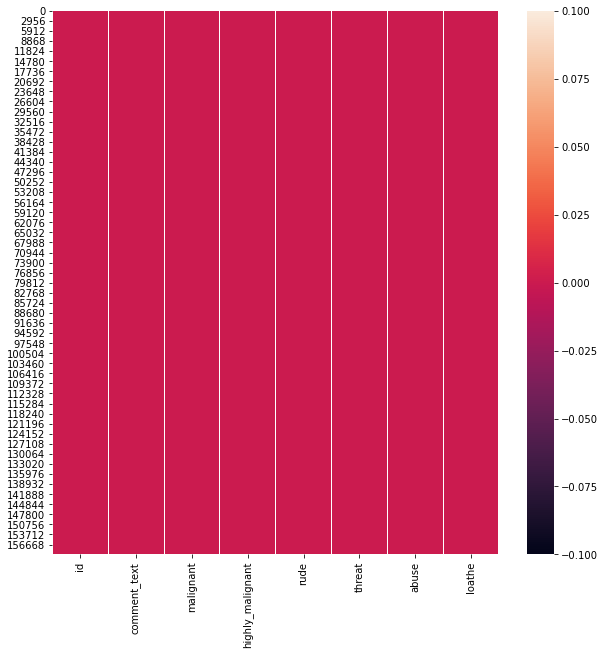

In [12]:
# heatmape
plt.figure(figsize=[10,10])
sns.heatmap(trained_df.isna())

In [13]:
#find out corrilation in train dataset
trained_df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

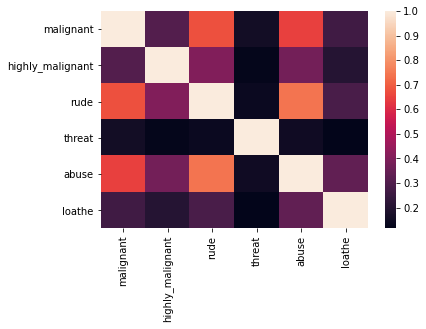

In [14]:
#checking corr using heatmape
sns.heatmap(trained_df.corr())

In [15]:
#Checking the skewness for the features:
trained_df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


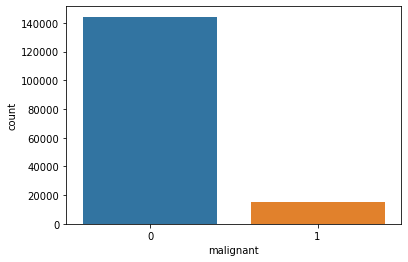

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


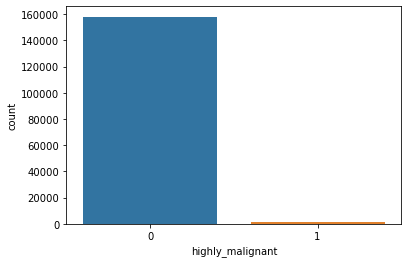

rude


0    151122
1      8449
Name: rude, dtype: int64


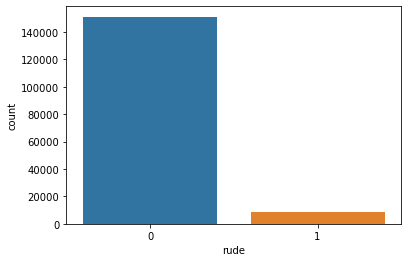

threat


0    159093
1       478
Name: threat, dtype: int64


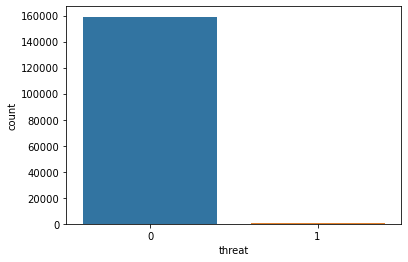

abuse


0    151694
1      7877
Name: abuse, dtype: int64


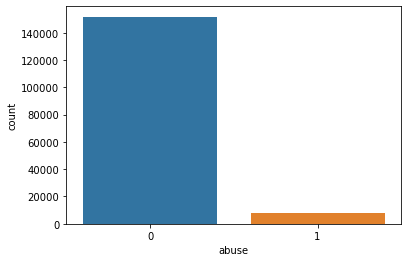

loathe


0    158166
1      1405
Name: loathe, dtype: int64


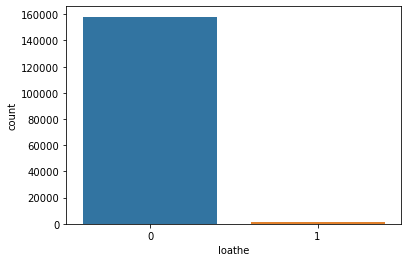

In [16]:
import warnings
warnings.filterwarnings('ignore')

col=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in col:
    print(i)
    print("\n")
    print(trained_df[i].value_counts())
    sns.countplot(trained_df[i])
    plt.show()

In [17]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords,wordnet
import string

In [18]:
trained_df['length'] = trained_df['comment_text'].str.len()
trained_df.head(4)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622


length represent how many time word are repeated in each raw

In [19]:
lem=WordNetLemmatizer()
trained_df['comment_text'] = trained_df['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [20]:
trained_df['clean_length'] = trained_df.comment_text.str.len()
trained_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,264,264
1,000103f0d9cfb60f,D'aww! He match this background colour I'm see...,0,0,0,0,0,0,112,109
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,233
3,0001b41b1c6bb37e,""" More I can't make any real suggestion on imp...",0,0,0,0,0,0,622,611
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,67


In [21]:
#Total length removal
print ('Origin Length', trained_df.length.sum())
print ('Clean Length', trained_df.clean_length.sum())

Origin Length 62893130
Clean Length 61859133


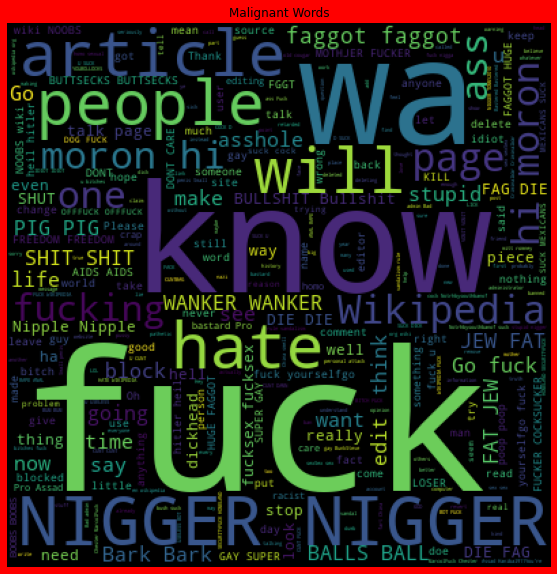

In [22]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
mal=trained_df['comment_text'][trained_df['malignant']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Malignant Words')
plt.show()

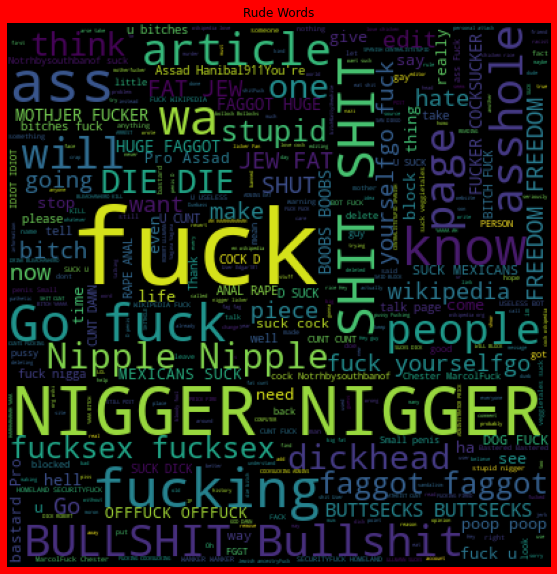

In [23]:
mal=trained_df['comment_text'][trained_df['rude']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Rude Words')
plt.show()

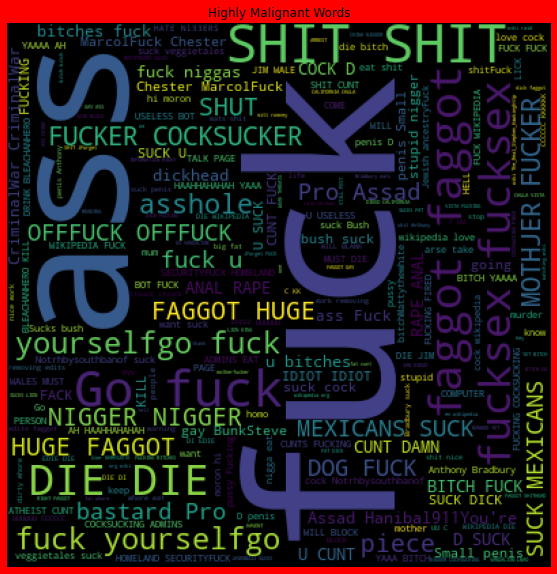

In [24]:
mal=trained_df['comment_text'][trained_df['highly_malignant']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Highly Malignant Words')
plt.show()

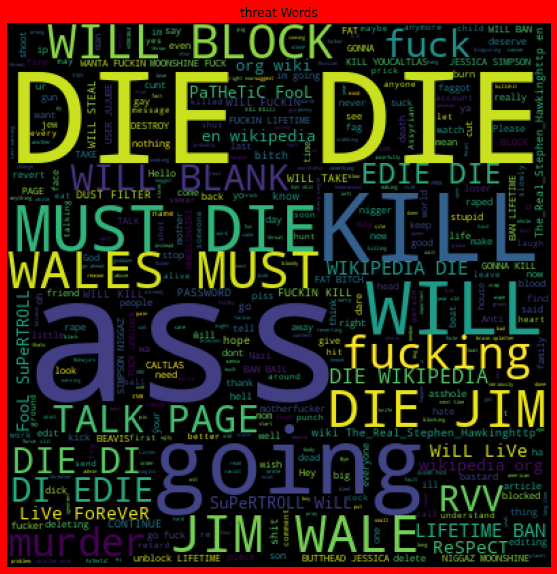

In [25]:
mal=trained_df['comment_text'][trained_df['threat']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='threat Words')
plt.show()

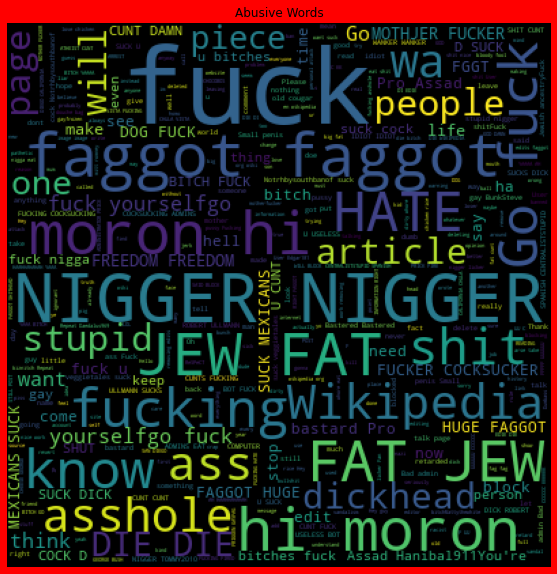

In [26]:
mal=trained_df['comment_text'][trained_df['abuse']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Abusive Words')
plt.show()

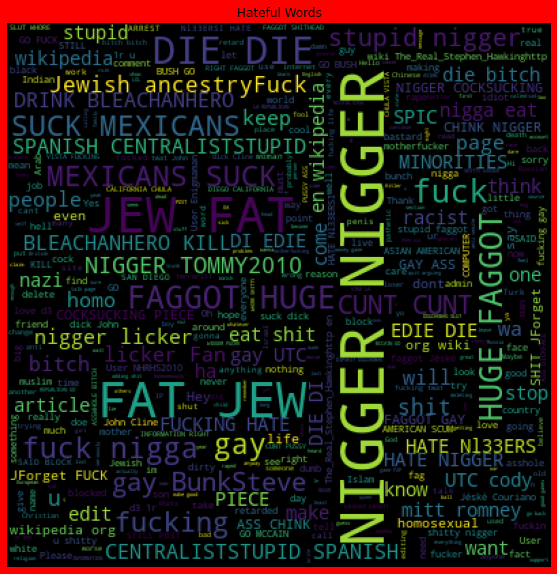

In [27]:
mal=trained_df['comment_text'][trained_df['loathe']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Hateful Words')
plt.show()

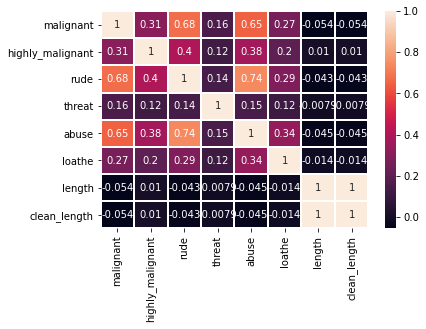

In [28]:
sns.heatmap(trained_df.corr(),annot=True,linewidth=1)
plt.show()

In [29]:
trained_df['comment_type'] = trained_df.iloc[:,1:7].sum(axis=1)

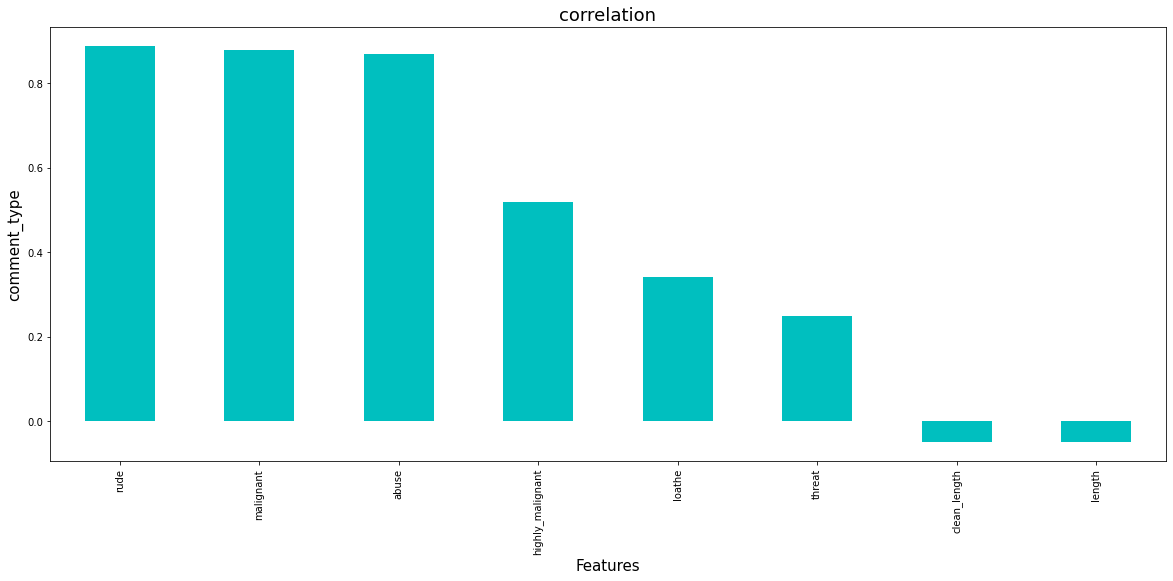

In [30]:
plt.figure(figsize = (20,8))
trained_df.corr()['comment_type'].sort_values(ascending = False).drop(['comment_type']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('comment_type',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Rude,Abuse, Malignant have highest positive correlation with comment_type

Dropping columns 'Cleaned_Stringlength' and 'Stringlength' since they are highly correlated to each other and do not contribute to model building

In [31]:
from collections import Counter

In [32]:
ben = Counter(",".join(trained_df[trained_df['comment_type']==0]["comment_text"]).split()).most_common(10)
mal = Counter(",".join(trained_df[trained_df['comment_type']==1]["comment_text"]).split()).most_common(10)
Countdf=pd.DataFrame()
print("TOP 10 Malignant and Benign Words with their counts")
Countdf['Malignant Words']=mal
Countdf['Benign Words']=ben
Countdf.head(10)

TOP 10 Malignant and Benign Words with their counts


,Malignant Words,Benign Words
0,"(the, 10313)","(the, 426854)"
1,"(a, 9776)","(to, 272851)"
2,"(to, 8661)","(a, 248072)"
3,"(I, 8104)","(of, 208112)"
4,"(you, 8003)","(and, 192260)"
5,"(and, 7438)","(I, 158636)"
6,"(of, 5987)","(is, 153308)"
7,"(is, 5604)","(you, 136665)"
8,"(that, 4161)","(that, 133058)"
9,"(in, 3270)","(in, 124184)"


In [33]:
#Importing necessary libraries and the algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

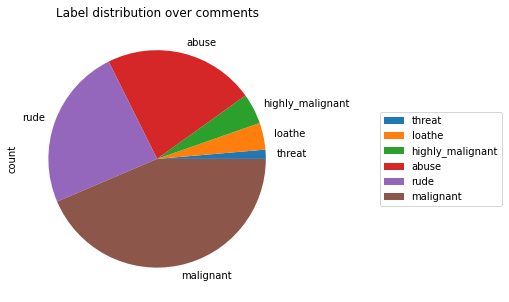

In [34]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = trained_df[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                         title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))  #Creating the pie plot

In [35]:
#Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(trained_df['comment_text'])
x = features
y=trained_df['comment_type']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [37]:
y_train.shape,y_test.shape

((111699,), (47872,))

#### LogisticRegression

In [38]:
LG = LogisticRegression(C=1, max_iter = 3000)
LG.fit(x_train, y_train)
y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9335893785978389
Test accuracy is 0.9209767713903744
[[42826   116    15     8     0     0]
 [ 1485   315    57   115     1     0]
 [  493   207    97   267     5     0]
 [  288   168   117   795    41     0]
 [   46    22    18   289    56     0]
 [    3     0     2     8    12     0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     42965
           1       0.38      0.16      0.22      1973
           2       0.32      0.09      0.14      1069
           3       0.54      0.56      0.55      1409
           4       0.49      0.13      0.21       431
           5       0.00      0.00      0.00        25

    accuracy                           0.92     47872
   macro avg       0.44      0.32      0.35     47872
weighted avg       0.89      0.92      0.90     47872



##### DecisionTreeClassifier

In [39]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9977439368302312
Test accuracy is 0.901403743315508
[[41728   871   207   146    12     1]
 [ 1131   422   209   188    22     1]
 [  333   190   210   301    33     2]
 [  177   191   204   691   137     9]
 [   34    29    43   223    98     4]
 [    5     1     0     8     8     3]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42965
           1       0.25      0.21      0.23      1973
           2       0.24      0.20      0.22      1069
           3       0.44      0.49      0.47      1409
           4       0.32      0.23      0.26       431
           5       0.15      0.12      0.13        25

    accuracy                           0.90     47872
   macro avg       0.39      0.37      0.38     47872
weighted avg       0.89      0.90      0.90     47872



#### RandomForestClassifier

In [40]:

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9977349841986052
Test accuracy is 0.9195354278074866
[[42711   137    45    72     0     0]
 [ 1452   192   117   207     5     0]
 [  443    95   159   362    10     0]
 [  263    86    97   908    53     2]
 [   34    10    19   319    49     0]
 [    2     0     3    15     4     1]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42965
           1       0.37      0.10      0.15      1973
           2       0.36      0.15      0.21      1069
           3       0.48      0.64      0.55      1409
           4       0.40      0.11      0.18       431
           5       0.33      0.04      0.07        25

    accuracy                           0.92     47872
   macro avg       0.48      0.34      0.36     47872
weighted avg       0.89      0.92      0.90     47872



#### AdaBoostClassifier

In [41]:

ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9129446100681295
Test accuracy is 0.9107829211229946
[[42872    23     4    65     1     0]
 [ 1847    19     6    99     2     0]
 [  791     8     7   247    12     4]
 [  631    20     4   645    67    42]
 [  105     3     4   226    55    38]
 [    4     0     3     5    10     3]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     42965
           1       0.26      0.01      0.02      1973
           2       0.25      0.01      0.01      1069
           3       0.50      0.46      0.48      1409
           4       0.37      0.13      0.19       431
           5       0.03      0.12      0.05        25

    accuracy                           0.91     47872
   macro avg       0.39      0.29      0.29     47872
weighted avg       0.87      0.91      0.88     47872



#### KNeighborsClassifier

In [42]:

knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.908826399520139
Test accuracy is 0.9040148729946524
[[42918    25    14     8     0     0]
 [ 1859    52    31    30     1     0]
 [  908    21    56    73    11     0]
 [ 1072    19    54   203    61     0]
 [  261     6    21    95    48     0]
 [   18     0     2     4     1     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     42965
           1       0.42      0.03      0.05      1973
           2       0.31      0.05      0.09      1069
           3       0.49      0.14      0.22      1409
           4       0.39      0.11      0.17       431
           5       0.00      0.00      0.00        25

    accuracy                           0.90     47872
   macro avg       0.42      0.22      0.25     47872
weighted avg       0.86      0.90      0.87     47872



#### RandomForestClassifier

#### Based on comparing the above graphs, roc_auc_scores,Precision, Recall, Accuracy Scores with Cross validation scores and log loss scores, it is determined that Random Forest Classifier,Passive Aggressive Classifier and Logistic Regression are the best models for the dataset.

## HyperParameter tunning

In [46]:
parameter = {'n_estimators':[50,100,300],'max_depth': [10,60],'min_samples_leaf':[2,5,30],'min_samples_split':[1,2,5],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [47]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [ ]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
GridCV.best_params_

In [ ]:
Best_mod2 = LogisticRegression(penalty = 'l1',dual = False,fit_intercept=False,C=10,solver='liblinear',max_iter=100)
Best_mod2.fit(x_train,y_train)
LRpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,LRpred)
print(acc*100)
conf_matrx = confusion_matrix(y_test,LRpred)
conf_matrx

In [ ]:
accu = classification_report(y_test,LRpred)
print(accu)

In [ ]:
parameter = {'C':[1,2,5,10],'fit_intercept':[True,False],'early_stopping':[True,False],'validation_fraction':[0.001,0.1],'tol':[0.001,0.01,0.1,1.0],'n_iter_no_change':[5,10],'max_iter':[1000,1500,2000,5000]}

In [ ]:
GridCV = GridSearchCV(PassiveAggressiveClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [ ]:
GridCV.fit(x_train,y_train)

In [ ]:
GridCV.best_params_

In [ ]:
Best_mod5 = PassiveAggressiveClassifier(C=1,early_stopping=False,fit_intercept=False,max_iter=1000,n_iter_no_change=10,tol=0.01,validation_fraction=0.001)
Best_mod5.fit(x_train,y_train)
pcpred = Best_mod5.predict(x_test)
acc = accuracy_score(y_test,pcpred)
print(acc*100)
conf_matrx = confusion_matrix(y_test,pcpred)
conf_matrx

After Tuning the hyper parameters it is found that Logistic Regression model performs the best.
##### Saving The Model

In [ ]:
import joblib
joblib.dump(Best_mod2,"BestModelMalignantClassifier.pkl")

#### Preparing Test Dataset

In [ ]:
testDF.head()

In [ ]:
# Convert all messages to lower case
testDF['comment_text'] = testDF['comment_text'].str.lower()


testDF['comment_text'] = testDF['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress') # Replace email addresses with 'email'

# Replace URLs with 'webaddress'
testDF['comment_text'] = testDF['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


testDF['comment_text'] = testDF['comment_text'].str.replace(r'£|\$', 'dollars')# Replace money symbols with 'moneysymb' 

# Replacing 10 digit phone numbers with 'phonenumber'
testDF['comment_text'] = testDF['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

testDF['comment_text'] = testDF['comment_text'].str.replace(r'\d+(\.\d+)?','num') # Replace numbers with 'num'


testDF['comment_text'] = testDF['comment_text'].str.replace(r'[^\w\d\s]',' ') #removing punctuations

testDF['comment_text'] = testDF['comment_text'].str.replace(r'[\_]',' ') #removing underscore characters

testDF['comment_text'] = testDF['comment_text'].str.replace(r'\s+[a-zA-Z]\s+', ' ') #removing single characters

testDF['comment_text'] = testDF['comment_text'].str.replace(r'\s+', ' ') #removing whitespace between terms with a single space

testDF['comment_text'] = testDF['comment_text'].str.replace(r'^\s+|\s+?$', ' ') #removing leading and trailing whitespace

#### Loading The Model

In [ ]:
mod=joblib.load("BestModelMalignantClassifier.pkl")
mod.predict(test)

Comment Classification 1 means Malignant and 0 means Benign

In [ ]:
Prediction_accuracy = pd.DataFrame({'Classification': mod.predict(test), 'Comments': testDF['comment_text']})
Prediction_accuracy.head()